# Exercise 1: Polynomial under- and overfitting

Consider the following non-linear model,
$$
\begin{aligned}
y_i &= f(x_i) + \epsilon_i \\
f(x) &= \cos\left(\frac{3}{2} \pi x \right) \\
\epsilon_i &\stackrel{\text{iid}}{\sim} N(0, \sigma_{\epsilon}^2)
\end{aligned}
$$
where $y_i$ is a trigonometric function of $x_i$ but is measured with an additive error $\epsilon_i$. In this exercise, we are going to approximate $y_i$ using polynomials in $x_i$ of varying degrees.

***
## Part 1: Creating and plotting a sample

The function `fcn()` implements the true relationship $y=f(x)$. 

In [1]:
import numpy as np

def fcn(x):
    """
    True function without errors
    """
    return np.cos(1.5 * np.pi * x)

Using this function, create a sample of size $N=50$ where the $x_i$ are randomly drawn from a uniform distribution on the interval $[0, 1]$ and 
$\sigma_{\epsilon} = 0.2$ (initialize your RNG with a seed of 1234).
Then generate $y_i$ according to the equation given above. 

Create a scatter plot of the sample $(x_i, y_i)$ and add a line depicting the true relationship without measurement error.

### Solution

We first draw a sample of $x$ and $\epsilon$ and compute the value for $y$ using the true relationship implemented in `fcn()`:

In [2]:
import numpy as np
from numpy.random import default_rng

# Initialize random number generator
rng = default_rng(seed=1234)

# Sample size
N = 50
# Standard deviation of error term
sigma = 0.2

# Draw explanatory variable x from uniform distribution
x = rng.uniform(size=N)

# Draw error term from normal distribution
epsilon = rng.normal(scale=sigma, size=N)
y = fcn(x) + epsilon

# Convert features to matrix for sklearn 
X = x[:, None]

The following code plots the sample and the true function $y = f(x)$:

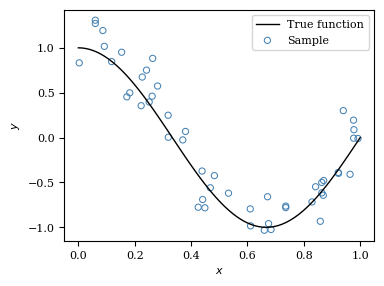

In [3]:
import matplotlib.pyplot as plt

xvalues = np.linspace(0.0, 1.0, 101)
y_true = fcn(xvalues)

# Plot true function
plt.plot(xvalues, y_true, color='black', lw=1.0, label='True function')

# Plot sample as scatter plot
plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', lw=0.75, label='Sample')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

***
## Part 2: Polynomial approximations

In order to approximate this relationship using polynomials, you first want to visualize how the polynomial degree affects the model fit. To this end, complete the template for `plot_poly_degree()` below to create a figure with 6 sub-plots,
each showing the predicted values for a polynomial of degree $d$, where $d \in \{0, 1, 2, 3, 10, 15\}$.
Each panel should additionally show the sample scatter plot and the true function $y = f(x)$.

How does the quality of the approximation change as you increase $d$? Do higher-order polynomials always perform better?

*Hints:* 

-   You should build a pipeline, e.g., using 
[`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html),
which combines the 
[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
transformation and 
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
to approximate $y$ as a polynomial in $x$.

-   When creating polynomials with `PolynomialFeatures(..., include_bias=True)`, you need to fit the model *without*
    an additional intercept as the intercept is already included in the polynomial.

In [4]:
import matplotlib.pyplot as plt

def plot_poly_degrees(degrees, X, y):
    """
    Fit and plot polynomial regression models of different degrees.

    Parameters
    ----------
    degrees : array-like
        List of polynomial degrees to fit and plot
    X : array-like
        Explanatory variable
    y : array-like
        Response variable
    """

    # Create figure with 3 columns
    ncol = 3
    nrow = int(np.ceil(len(degrees) / ncol))

    fig, axes = plt.subplots(
        nrow, ncol, figsize=(8, 5), sharex=True, sharey=True, constrained_layout=True
    )

    # x-values for predicting & plotting
    xvalues = np.linspace(0.0, 1.0, 101)
    # True y-values
    y_true = fcn(xvalues)

    for i, ax in enumerate(axes.flatten()):

        # Degree for current sub-plot
        d = degrees[i]

        # TODO: Create polynomial + estimation pipeline

        # TODO: Fit the model to the sample data

        # TODO: Predict the response variable for the x-values

        # TODO: Plot predicted values

        # Plot true relationship
        ax.plot(xvalues, y_true, color='black', lw=1.0)
        # Plot sample as scatter plot
        ax.scatter(X, y, s=20, color='none', edgecolor='steelblue', lw=0.75)
        ax.set_ylim((-1.5, 1.5))
        ax.legend()

### Solution

The code below shows the complete function.

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def plot_poly_degrees(degrees, X, y):
    """
    Fit and plot polynomial regression models of different degrees.

    Parameters
    ----------
    degrees : array-like
        List of polynomial degrees to fit and plot
    X : array-like
        Explanatory variable
    y : array-like
        Response variable
    """

    # Create figure with 3 columns
    ncol = 3
    nrow = int(np.ceil(len(degrees) / ncol))

    fig, axes = plt.subplots(
        nrow, ncol, figsize=(8, 5), sharex=True, sharey=True, constrained_layout=True
    )

    # x-values for predicting & plotting
    xvalues = np.linspace(0.0, 1.0, 101)
    # True y-values
    y_true = fcn(xvalues)

    for i, ax in enumerate(axes.flatten()):

        # Degree for current sub-plot
        d = degrees[i]

        # Create PipeLine object that consist of a polynomial transformation and
        # a linear regression model
        pipe_lr = make_pipeline(
            PolynomialFeatures(degree=d, include_bias=True),
            LinearRegression(fit_intercept=False),
        )

        # Fit model using current polynomial degree
        pipe_lr.fit(X, y)

        # Compute predicted values
        y_hat = pipe_lr.predict(xvalues[:, None])

        # Plot predicted values
        ax.plot(xvalues, y_hat, lw=1.25, c='darkorange', label=f'Degree {d}')

        # Plot true relationship and sample
        ax.plot(xvalues, y_true, color='black', lw=1.0)
        ax.scatter(X, y, s=20, color='none', edgecolor='steelblue', lw=0.75)
        ax.set_ylim((-1.5, 1.5))
        ax.legend()

With this implementation, we define the list of polynomial degrees to plot and call the function we just implemented.

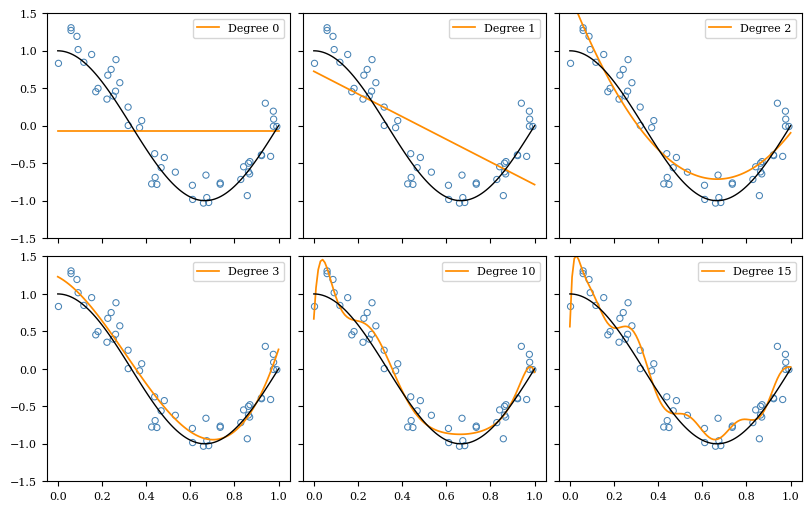

In [6]:
# Polynomial degrees to plot
degrees = np.array([0, 1, 2, 3, 10, 15])

plot_poly_degrees(degrees, X, y)

As the figure shows, a degree-0 polynomial is just a constant, while a polynomial of degree 1 is linear in $x$. Neither fits the true relationship very well ("underfitting"), but the fit initially improves as we increase $d$. For high $d$, on the other hand, the polynomial becomes too flexible and responds strongly to local "noise" introduced by measurement error ("overfitting").

***
## Part 3: Optimal polynomial degree with cross-validation

You want to find the optimal polynomial degree using cross-validation. To this end,
implement the function `compute_average_mse()` using the template below.

This function takes as arguments the polynomial degree $d$, the 
sample observations $(X, y)$ and the number of splits `n_splits`, and returns the mean squared error (MSE) for the
training and test samples averaged across all splits. 

*Hint:* To compute the MSE for each test sample, you can use 
[`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [7]:
from sklearn.model_selection import KFold

def compute_average_mse(d, X, y, n_splits=10):
    """
    Compute mean squared error averaged across splits in k-fold cross-validation.

    Parameters
    ----------
    d : int
        Degree of polynomial
    x : array-like
        Explanatory variable
    y : array-like
        Response variable
    n_splits : int
        Number of splits in k-fold cross-validation

    Returns
    -------
    mse_train : array-like
        Average MSE on training sample over all splits
    mse_test : array-like
        Average MSE on test sample over all splits
    """

    # TODO: create polynomial + estimation pipeline

    # Split sample into train/test blocks for k-fold validation
    kf = KFold(n_splits=n_splits)

    # list to store MSE for each CV split
    mse_train_splits = []
    mse_test_splits = []

    # Manually iterate over folds (train/test combinations)
    for itrain, itest in kf.split(X):

        # Extract training and test data for current split
        X_train = X[itrain]
        X_test = X[itest]

        y_train = y[itrain]
        y_test = y[itest]

        # TODO: Fit the model to current training data

        # TODO: Predict the response variable on both the training and test data

        # TODO: Compute the mean squared error for both the training and test data

        # TODO: Append the MSE to mse_train_splits and mse_test_splits

    # Compute average MSE over all splits
    mse_train = np.mean(mse_train_splits)
    mse_test = np.mean(mse_test_splits)

    return mse_train, mse_test


### Solution

The complete implementation looks as follows:

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def compute_average_mse(d, X, y, n_splits=10):
    """
    Compute mean squared error averaged across splits in k-fold cross-validation.

    Parameters
    ----------
    d : int
        Degree of polynomial
    x : array-like
        Explanatory variable
    y : array-like
        Response variable
    n_splits : int
        Number of splits in k-fold cross-validation
    
    Returns
    -------
    mse_train : array-like
        Average MSE on training sample over all splits
    mse_test : array-like
        Average MSE on test sample over all splits
    """

    pipe_lr = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=True),
        LinearRegression(fit_intercept=False)
    )

    # Split sample into train/test blocks for k-fold validation
    kf = KFold(n_splits=n_splits)

    # list to store MSE for each CV split
    mse_train_splits = []
    mse_test_splits = []

    # Manually iterate over folds (train/test combinations)
    for itrain, itest in kf.split(x):

        # Extract training and test data for current split
        X_train = X[itrain]
        X_test = X[itest]

        y_train = y[itrain]
        y_test = y[itest]

        pipe_lr.fit(X_train, y_train)

        y_train_hat = pipe_lr.predict(X_train)
        y_test_hat = pipe_lr.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_hat)
        mse_test = mean_squared_error(y_test, y_test_hat)

        mse_train_splits.append(mse_train)
        mse_test_splits.append(mse_test)

    # Compute average MSE over all splits
    mse_train = np.mean(mse_train_splits)
    mse_test = np.mean(mse_test_splits)

    return mse_train, mse_test

***
## Part 4: Computing the MSE for each hyperparameter

Using the function you wrote, compute the average MSEs for a sequence of 16 polynomial degrees $d = 0, 1, 2, \dots, 15$ using 10 splits.
Use the MSE statistics to plot the validation curve showing the average MSE on the $y$-axis against $d$ on the $x$-axis.
Which degree $d$ results in the lowest average MSE on the test sample? 

### Solution

We now use the functions we defined to evaluate the MSEs for each polynomial degree `d`. For each `d`, `compute_splits_mse()` returns the average MSE on the training and test samples.

In [9]:
# Sequence of polynomial degrees
degrees = np.arange(16)

# Lists to store mean MSEs for each degree
mse_train_mean = []
mse_test_mean = []

# Compute averaged MSEs for each degree
for d in degrees:
    mse_train_d, mse_test_d = compute_average_mse(d, X, y, n_splits=10)
    mse_train_mean.append(mse_train_d)
    mse_test_mean.append(mse_test_d)

# Convert to NumPy arrays
mse_train_mean = np.array(mse_train_mean)
mse_test_mean = np.array(mse_test_mean)

# Print test sample MSEs for each degree
mse_test_mean

array([0.49521769, 0.27989173, 0.09577028, 0.05607969, 0.05132543,
       0.05509927, 0.10352668, 0.19929675, 0.07690196, 0.05847113,
       0.3192001 , 0.35379416, 2.55444615, 2.0054191 , 0.24679516,
       0.50952588])

#### Finding the optimal parameter

We use [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)
to find the *index* of the smallest average MSE.

In [10]:
# Polynomial degree that minimizes MSE
imin = np.argmin(mse_test_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. MSE on the test sample: {dmin}')

Polynomial degree with min. MSE on the test sample: 4


The results can be visualized by plotting the average MSE by polynomial degree. As the graph shows, the minimum is obtained at $d = 4$. Intuitively, for low $d$ the model underfits the data, whereas overfitting occurs for high values of $d$.

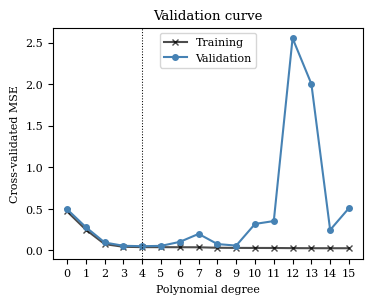

In [11]:
plt.plot(degrees, mse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Training')
plt.plot(degrees, mse_test_mean, c='steelblue', marker='o', ms=4, label='Validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated MSE')
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')
plt.title('Validation curve')
plt.legend()

***
## Part 5: Plotting the fitted model

Re-estimate the model using the optimal polynomial degree you just found and create a scatter plot with the original data, the true function $y = f(x)$, and the fitted polynomial.

### Solution

Using the optimal cross-validated polynomial degree, we re-estimate and plot the final model on the whole sample.

In [12]:
# Recreate pipeline with optimal degree
pipe_lr = make_pipeline(
    PolynomialFeatures(degree=dmin, include_bias=True),
    LinearRegression(fit_intercept=False)
)

pipe_lr.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=np.int64(4))),
                ('linearregression', LinearRegression(fit_intercept=False))])

The graph below shows the fit for this cross-validated model:

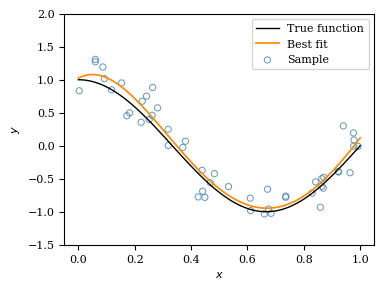

In [13]:
xvalues = np.linspace(0.0, 1.0, 101)
y_hat = pipe_lr.predict(xvalues[:, None])

plt.plot(xvalues, fcn(xvalues), color='black', lw=1.0, label='True function')

plt.plot(xvalues, y_hat, color='darkorange', lw=1.25, zorder=10, label='Best fit')

plt.scatter(
    X, y, s=20, color='none', edgecolor='steelblue', lw=0.75, alpha=0.8, label='Sample'
)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-1.5, 2.0)
plt.legend(loc='upper right')

***
## Part 6: Automatic cross-validation  with validation curves


You recall from the lecture that the steps in Parts (3) and (4) can be implemented in an easier way using
[`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html).
Re-implement the cross-validation using this function by completing the code template below. 

*Hint:* Don't forget that you have to use
the *negative* MSE as the relevant criterion, i.e., specify the argument
`scoring='neg_mean_squared_error'` when calling `validation_curve()`.

In [14]:
from sklearn.model_selection import validation_curve

# TODO: Create estimation pipeline

# TODO: Complete the call to validation_curve()
# train_scores, test_scores = validation_curve(
#     estimator=...,
#     X=X, y=y,
#     param_name=...,
#     param_range=...,
#     scoring=..., 
#     cv=10
# )

# TODO: Average train_scores and test_scores across CV splits

# TODO: Report the polynomial degree that minimizes the MSE on the test sample

### Solution

We first set up a pipeline using the 
[`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)
as this allows us to give custom names to each pipeline step, which we use later to specify which parameter to vary along the validation curve.


In [15]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline

# Create pipeline for polynomial features and linear regression.
# The degree of the polynomial DOES NOT MATTER at this point.
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=0, include_bias=True)),
    ('lr', LinearRegression(fit_intercept=False))
])

# Compute the MSEs for each degree and each split, returning arrays of 
# size len(degrees) x 10.
train_scores, test_scores = validation_curve(
    estimator=pipe,
    X=X, y=y,
    param_name='poly__degree',
    param_range=degrees,
    scoring='neg_mean_squared_error', 
    cv=10
)

# Compute mean for each degree (scores returned by function are 
# NEGATIVE MSEs)
mse_train_mean = np.mean(-train_scores, axis=1)
mse_test_mean = np.mean(-test_scores, axis=1)

The rest of this part proceeds in the same was as before.

In [16]:
# Find degree that minimizes MSE
imin = np.argmin(mse_test_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. MSE: {dmin}')

Polynomial degree with min. MSE: 4


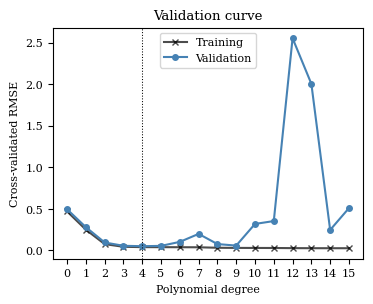

In [17]:
# Plot validation curve
plt.plot(degrees, mse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Training')
plt.plot(degrees, mse_test_mean, c='steelblue', marker='o', ms=4, label='Validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated RMSE')
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')
plt.title('Validation curve')
plt.legend()

***
# Exercise 2: Categorical features

In this exercise, we practice fitting models which include categorical features in the regressor matrix $\mathbf{X}$ using the Ames housing data set. There are several categorical variables in this data which come in two different kinds:

1.  [Nominal categorical variables](https://en.wikipedia.org/wiki/Nominal_category) capture qualitative categories. For numerical purposes, we often encode these as integer values, but any particular
    integer representation is arbitrary. It is a serious mistake to include such integer-valued categorical variables as *continuous* features in a model.

    In the Ames housing data, the `Neighborhood` column is one such nominal categorical variable (which is stored as a string containing the neighborhood name).

2.  [Ordinal categorical variables](https://en.wikipedia.org/wiki/Ordinal_data) represent data which have a natural ordering, but the distance between any two values can be arbitrary.
    
    For example, in the Ames housing data the `OverallQuality` variable is an ordinal categorical variable on a scale of 1–10. While a value of 2 is clearly better than a value of 1, it is up to
    interpretation how much better.

    Such variables can be included as categorical *dummy variables* in a model, not imposing any particular interpretation on the distance between two values. Alternatively, such variables can 
    be included as *continuous* variables, which imposes how the distance is interpreted. For example, including an ordinal categorical variable as a linear term in a model imposes
    that moving from 1 to 2 has the same effect on the outcome variable as moving from 2 to 3.

***
## Part 1: Creating the estimation sample

We load the Ames data the same way as we did in the lectures:

In [18]:
import pandas as pd

# Use local data/ folder
DATA_PATH = '../../data'

filename = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(filename, sep=',')

First, perform the following data preprocessing steps:

1.   Drop all observations which have any missing values for `SalePrice`, `OverallQuality`, or `Neighborhood`.
2.   Tabulate how many neighborhoods have less than 40 observations, and drop observations from these neighborhoods from the data set.

### Solution

In [19]:
# Keep only obs with non-missing data for relevant variables
variales = ['SalePrice', 'OverallQuality', 'Neighborhood']
df = df.dropna(subset=variales)

In [20]:
# Compile list of neighborhoods with less than 40 observations
nobs = df['Neighborhood'].value_counts().sort_values()

# Select neighborhoods with less than minimum observations
MIN_OBS = 40
few_nobs = nobs.loc[nobs < MIN_OBS]

print(f'Number of neighborhoods with less than {MIN_OBS} observations: {len(few_nobs)}')
# Print these neighborhoods
few_nobs

Number of neighborhoods with less than 40 observations: 9


Neighborhood
Landmrk     1
GrnHill     2
Greens      8
Blueste    10
NPkVill    23
Veenker    24
Blmngtn    28
BrDale     30
MeadowV    37
Name: count, dtype: int64

In [21]:
# Keep only neighborhoods with minimum number of observations
nobs = df.groupby('Neighborhood')['Neighborhood'].transform('count')
df = df[nobs >= MIN_OBS]

***
## Part 2: Exploratory data analysis

Before fitting a model, you should perform some exploratory data analysis to familiarize yourself with the data:

1.  Compute the correlations of `SalePrice` with all numerical variables in the data. Which one is the most correlated?
2.  Create a histogram for the variable `OverallQuality`, showing the number of observations for each of the possible values 1–10.

    *Hint:* Create a `Series` with the number of observations per quality level and plot it as a bar chart using 
        [Series.plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html).

3.  Create a box plot showing the `SalePrice` by `OverallQuality`. 

    *Hint:* You can use the pandas plotting function [DataFrame.plot.box()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
    for this.

4.  Create a box plot showing the `SalePrice` by `Neighborhood`. 

### Solution

We can compute the pairwise correlations using the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method. This returns the whole (symmetric) correlation matrix, but since we are interested only in the correlations with `SalePrice`, we select only that row.

In [22]:
# Compute correlation of SalePrice with other covariates
df.corr(numeric_only=True).loc['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQuality      0.805031
LivingArea          0.706382
YearBuilt           0.571337
Bathrooms           0.553743
YearRemodeled       0.533235
Fireplaces          0.470500
LotArea             0.242601
HasGarage           0.220633
Bedrooms            0.152900
MonthSold           0.035311
YearSold           -0.024480
OverallCondition   -0.109315
Name: SalePrice, dtype: float64

As the table shows, `OverallQuality` is the explanatory variable that has the highest correlation with `SalePrice`.

Next, we create a bar chart depicting the number of observations by overall quality. We can do this by grouping by `OverallQuality` and counting the number of elements with 
[`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html), 
and then using the pandas plotting routines to create a bar char.

<Axes: xlabel='Overall quality', ylabel='Number of observations'>

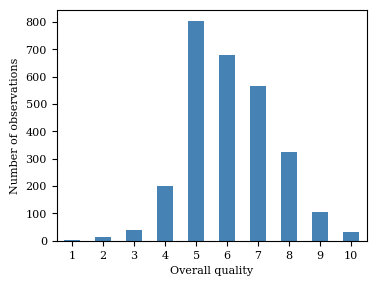

In [23]:
# Create histogram of OverallQuality
df.groupby('OverallQuality').size().plot.bar(
    rot=0, color='steelblue', xlabel='Overall quality', ylabel='Number of observations'
)

We use the 
[`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
method to create a box plot of the sale price by overall quality.

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

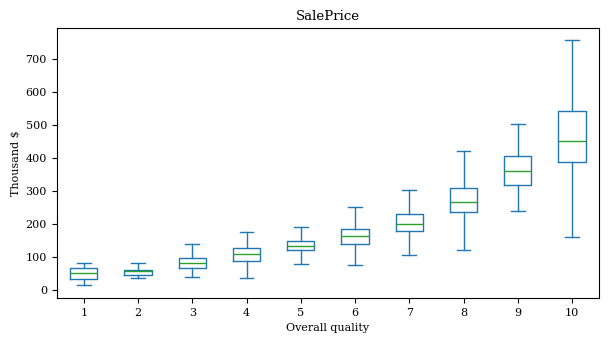

In [24]:
df.plot.box(
    by='OverallQuality',
    column='SalePrice',
    showfliers=False,
    figsize=(7, 3.5),
    ylabel='Thousand $',
    xlabel='Overall quality',
)

As you can see, there is a clear increasing relationship between sale price and overall quality.

The same approach can be used to create the box plot by neighborhood:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

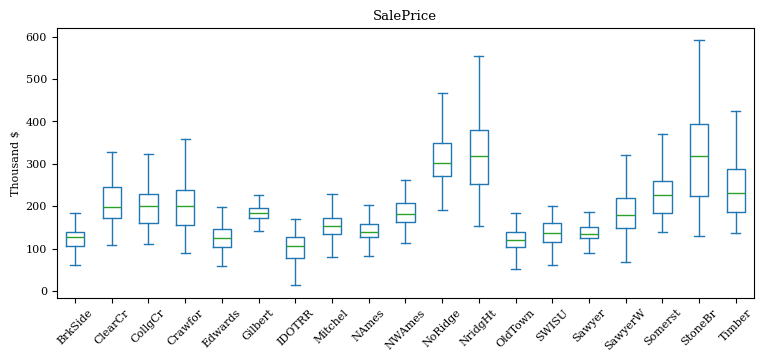

In [25]:
df.plot.box(
    by='Neighborhood',
    column='SalePrice',
    showfliers=False,
    figsize=(9, 3.5),
    ylabel='Thousand $',
    xlabel='',
    rot=45
)

***
## Part 3: Train-test split

Split the data into a training and a test sample, assigning 40% of observations to the test sample, and report the number of observations in each set.

Stratify your split by `Neighborhood` so that each neighborhood is approximately equally represented in the training and test samples 
(use the `stratify` argument of 
[`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for this).
Specify a random seed of 1234.

Note that you can pass the whole `DataFrame` to `train_test_split()` instead of individual `X` and `y` values.
The function will then return two DataFrames, one containing the training and one the test data.

### Solution

In [26]:
from sklearn.model_selection import train_test_split

# Fraction of sample to use for testing
test_size = 0.4

# Split sample into training and test samples using the whole DataFrame
df_train, df_test = train_test_split(
    df, test_size=test_size, stratify=df['Neighborhood'], random_state=1234
)

print(f'Number of observations in training sample: {len(df_train):5,d}')
print(f'Number of observations in test sample:     {len(df_test):5,d}')

Number of observations in training sample: 1,660
Number of observations in test sample:     1,107


***
## Part 4: Predict sale price by neighborhood

Create an estimator pipeline to fit the model
$$
SalePrice_{ij} = \mu_j + \epsilon_{ij}
$$
where $i$ indexes observations and $j$ indexes neighborhoods. That is, the sale price for a house $i$ in neighborhood $j$ is predicted to be average sale price $\mu_j$ in that neighborhood.

In order to estimate this model, you'll have to convert the categorical string variable `Neighborhood` to a set of 0/1 dummy variabes. This can be achieved
using the 
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
as a step in a pipeline.

Fit the model on the training data, and report the RMSE both on the training and the test sample.

### Solution

We first extract the target and features from the training and test DataFrames. Note that `scikit-learn` expects a feature *matrix*, so we should extract the features as a list of columns even if there is only a single feature.

In [27]:
features = ['Neighborhood']
target = 'SalePrice'

# Extract features and target variable
X_train, y_train = df_train[features], df_train[target]
X_test, y_test = df_test[features], df_test[target]

We can now build an estimation pipeline that uses `OneHotEncoder` as a data preprocessing step. This step converts the categorical variables into a matrix of zeros and ones, where each column corresponds to one neighborhood and contains 1 if the observation is located in that neighborhood, and 0 otherwise.

Note that we need to either drop the first category (`drop='first'`) if we want to fit the model with an intercept, or specify `fit_intercept=False`. Otherwise, the regressor matrix $\mathbf{X}$ will be collinear.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Drop first dummy column, estimate model with intercept
pipe_dummies = make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False),
    LinearRegression(fit_intercept=True)
)

Alternatively and equivalently, we can specify the estimation pipeline as follows:

In [29]:
# Don't drop first dummy column, don't estimate model with additional intercept
pipe_dummies = make_pipeline(
    OneHotEncoder(drop=None, sparse_output=False),
    LinearRegression(fit_intercept=False)
)

In [30]:
# Fit the model
pipe_dummies.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

With the fitted model, we can inspect the estimated coefficients:

In [31]:
# Vector of estimated coefficients
pipe_dummies.named_steps['linearregression'].coef_

array([124.24307692, 216.93846154, 204.3875    , 201.87258065,
       134.88103448, 189.11313131, 104.09285714, 162.12058824,
       145.11578947, 187.27721519, 332.82093023, 319.1       ,
       126.47552448, 130.13793103, 136.49120879, 190.42933333,
       224.84678899, 308.77741935, 244.16511628])

There are 19 estimated coefficients, one for each of the neighborhoods present in the data. The exact order of these coefficients might depend on the ordering of the neighborhoods in the data. The estimates say that for the first neighborhood, the average sale price was about 124 thousand USD, etc.

Once the model is fitted, we compute the predicted values for each observation and compute the RMSE.

In [32]:
from sklearn.metrics import root_mean_squared_error

y_train_hat = pipe_dummies.predict(X_train)
y_test_hat = pipe_dummies.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_train_hat)
rmse_test = root_mean_squared_error(y_test, y_test_hat)

print(f'RMSE on train sample: {rmse_train:.5f}')
print(f'RMSE on test sample: {rmse_test:.5f}')

RMSE on train sample: 53.58493
RMSE on test sample: 52.82692


***
## Part 5: Predict sale price with overall quality polynomial

You are now asked to fit the following model:
$$
SalePrice_i = \beta_0 + \beta_1 OverallQuality + \beta_1 OverallQuality^2 + \dots + \beta_1 OverallQuality^K + \epsilon_i
$$
where the sale price is assumed to be a function of a polynomial in overall quality where we vary the polynomial degree $K$. We are thus implicitly treating the ordinal categorical variable `OverallQuality` as a continuous variable, which may or may not be admissible depending on the data. We will compare the estimation results to treating `OverallQuality` as a proper categorical in the next part.

Use the following template code to fit the above model for polynomial degrees $d = 1, 2, \dots, 9$ and compute the cross-validated RMSE on the training and test samples.
For this you should use the function 
[`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). 
This function returns a dictionary with the keys `'train_score'` and `'test_score'` which contain the computed scores for each split.
Note that you need to pass `return_train_score=True`, otherwise the function does not return the scores for the training data.

Create a plot showing the validation curves for both the training and test samples, and report the polynomial degree which minimizes the RMSE on the test sample.

In [33]:
import numpy as np

degrees = np.arange(1, 10)

rmse_train_mean = []
rmse_test_mean = []

for d in degrees:
    # TODO: Create polynomial features + estimation pipeline

    # TODO: Compute RMSE using cross-validation
    # scores = cross_validate(
    #     estimator=..., 
    #     X=X_train, y=y_train, 
    #     scoring=..., 
    #     cv=5,
    #     return_train_score=True,
    #     n_jobs=-1
    # )

    # TODO: Compute average RMSE over all CV splits
    # rmse_train_mean.append(np.mean(-scores['train_score']))
    # rmse_test_mean.append(np.mean(-scores['test_score']))

    pass


### Solution

We first select the features and target variables from the `DataFrame`. Note that `scikit-learn` expects a feature *matrix*, so we should extract the features as a list of columns even if there is only a single feature.

In [34]:
features = ['OverallQuality']
target = 'SalePrice'

# Extract features and target variable
X_train, y_train = df_train[features], df_train[target]
X_test, y_test = df_test[features], df_test[target]

We iterate over the list of polynomial degrees, create a new pipeline for each degree, and run the cross-validation. We then use the dictionary returned by `cross_validate()` to extract the RMSEs for the training and test samples for all splits, which we then need to average over splits. Note that `cross_validate()` returns the *negative* RMSE.

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_validate

# Polynomial degrees to consider
degrees = np.arange(1, 10)

rmse_train_mean = []
rmse_test_mean = []

for d in degrees:
    # Create polynomial features + linear regression pipeline
    pipe_lr = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        StandardScaler(),
        LinearRegression(fit_intercept=True)
    )

    # Run cross-validation. Function returns a dictionary with scores
    scores = cross_validate(
        estimator=pipe_lr,                          # Estimator to use
        X=X_train, y=y_train,                       # Data to fit
        scoring='neg_root_mean_squared_error',      # Scoring metric
        cv=5,                                       # Number of CV splits
        return_train_score=True,                    # Also return training scores
        n_jobs=-1                                   # Use all available CPUs
    )

    # Compute average RMSE over all CV splits
    rmse_train_mean.append(np.mean(-scores['train_score']))
    rmse_test_mean.append(np.mean(-scores['test_score']))

# Convert to NumPy arrays
rmse_train_mean = np.array(rmse_train_mean)
rmse_test_mean = np.array(rmse_test_mean)

Using this data, we can determine the optimal polynomial degree as the one which minimizes the RMSE on the test sample.

In [36]:
# Find degree that minimizes RMSE
imin = np.argmin(rmse_test_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. RMSE: {dmin}')

Polynomial degree with min. RMSE: 3


Finally, the following code creates the validation curve.

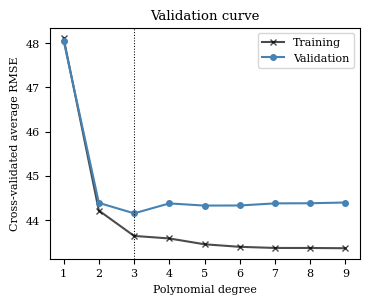

In [37]:
import matplotlib.pyplot as plt

# Plot validation curve
plt.plot(degrees, rmse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Training')
plt.plot(degrees, rmse_test_mean, c='steelblue', marker='o', ms=4, label='Validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated average RMSE')
plt.xticks(degrees)
plt.axvline(dmin, ls=':', lw=0.75, c='black')
plt.title('Validation curve')
plt.legend()

***
## Part 6: Predict sale price with overall quality dummies

You are now interested whether treating the overall quality as a proper categorical variable improves the model performance. To this end, estimate the model
$$
SalePrice_{ij} = \mu_j + \epsilon_{ij}
$$
where $i$ indexes observations and $j$ indexes the overall quality categories 1–10. That is, the sale price for a house $i$ with overall quality $j$ is predicted to be average sale price $\mu_j$ of all houses with that overall quality.

Create an estimation pipeline to fit the model and perform cross-validation exactly as you did for the polynomial case above.
Note that cross-validation is not needed for this model at all since it has no hyperparameters, but it creates a fair comparison to the polynomial case since we are estimating & predicting on the same sample using the same splits.

Recreate the validation curve from above and add two horizontal lines showing the average RMSE from the dummy model for the training and tests sets.


In [38]:
# TODO: Create pipeline with dummies variables + estimation

# TODO: Run cross-validation
# scores = cross_validate(
#     estimator=..., 
#     X=X_train, y=y_train, 
#     scoring=..., 
#     cv=5,
#     return_train_score=True,
#     n_jobs=-1
# )

# TODO: Compute average RMSE over all CV splits
# rmse_train_dummies_mean = np.mean(-scores['train_score'])
# rmse_test_dummies_mean = np.mean(-scores['test_score'])

### Solution

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Create pipeline with dummies variables + linear regression
pipe_dummies = make_pipeline(
    OneHotEncoder(drop='first'),
    LinearRegression(fit_intercept=True)
)

# Run cross-validation
scores = cross_validate(
    estimator=pipe_lr, 
    X=X_train, y=y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Compute average RMSE over all CV splits
rmse_train_dummies_mean = np.mean(-scores['train_score'])
rmse_test_dummies_mean = np.mean(-scores['test_score'])

print(f'Average RMSE on train sample: {rmse_train_dummies_mean:.5f}')
print(f'Average RMSE on validation sample: {rmse_test_dummies_mean:.5f}')

Average RMSE on train sample: 43.35949
Average RMSE on validation sample: 44.39483


We use the same plotting code as above, and add the horizontal lines for the dummy variable model on top.

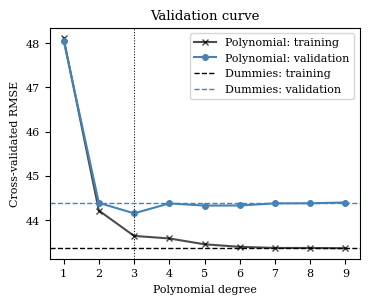

In [40]:
# Plot validation curve
plt.plot(degrees, rmse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Polynomial: training')
plt.plot(degrees, rmse_test_mean, c='steelblue', marker='o', ms=4, label='Polynomial: validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated RMSE')
plt.xticks(degrees)
plt.axvline(dmin, ls=':', lw=0.75, c='black')

# Add horizontal lines for RMSE from dummy regressions
plt.axhline(rmse_train_dummies_mean, ls='--', lw=1.0, c='black', label='Dummies: training')
plt.axhline(rmse_test_dummies_mean, ls='--', lw=1.0, c='steelblue', label='Dummies: validation')
plt.title('Validation curve')
plt.legend()

As you can see, the dummy variable model in general does better on the training sample. That is by construction, since the dummy variable model is arbitrarily flexible and nests the polynomial model as a special case.
Results are not as clear-cut on the validation sample, but this may as well be due to randomness of how the splits are created.

***
## Part 7: Compare predictions on the test sample

Finally, use the best polynomial model and the dummy model estimated on the whole training sample, and compute the RMSE on the test sample. Which model performs better?

### Solution

In [41]:
# Re-estimate polynomial model on the whole training sample
pipe_poly_best = make_pipeline(
    PolynomialFeatures(degree=dmin, include_bias=False),
    StandardScaler(),
    LinearRegression(fit_intercept=True)
).fit(X_train, y_train)

# Re-estimate dummies model on the whole training sample
pipe_dummies.fit(X_train, y_train)

# Predict response variable on test sample
y_test_poly_hat = pipe_poly_best.predict(X_test)
y_test_dummies_hat = pipe_dummies.predict(X_test)

# Compute RMSE on test sample
rmse_test_poly = root_mean_squared_error(y_test, y_test_poly_hat)
rmse_test_dummies = root_mean_squared_error(y_test, y_test_dummies_hat)

print(f'RMSE on test sample (polynomial): {rmse_test_poly:.5f}')
print(f'RMSE on test sample (dummies): {rmse_test_dummies:.5f}')

RMSE on test sample (polynomial): 42.93533
RMSE on test sample (dummies): 42.82456


As you can see, in this case the dummy variable model has a lower RMSE on the test sample.